In [19]:
import json, os
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
morph = MorphAnalyzer()
stops = set(stopwords.words('russian'))

In [20]:
PATH_TO_DATA = '/Users/dariabakshandaeva/Documents/data'

In [21]:
files = [os.path.join(PATH_TO_DATA, file) for file in os.listdir(PATH_TO_DATA) if file.endswith('jsonlines')]

In [22]:
data = pd.concat([pd.read_json(file, lines=True) for file in files][:1], axis=0, ignore_index=True)
data.head(3)

,content,keywords,summary,title,url
0,В среду состоялось отложенное заседание Совета...,"[школа, образовательные стандарты, литература,...","Глава Минобрнауки считает, что в нездоровом аж...","Ольга Васильева обещала ""НГ"" не перегружать шк...",https://amp.ng.ru/?p=http://www.ng.ru/educatio...
1,"Хорошо, когда красота в глазах смотрящего живе...","[красота, законы]",О живительной пользе укорота при выборе между ...,У красоты собственные закон и воля,https://amp.ng.ru/?p=http://www.ng.ru/style/20...
2,Когда-то Леонид Юзефович написал книгу о монго...,"[юзефович, гражданская война, пепеляев, якутия]",Крепость из тел и призрак независимой Якутии,Апокалиптический бунт,https://amp.ng.ru/?p=http://www.ng.ru/zavisima...


посмотрим, сколько у нас слов в каждой статье и каков средний показатель количества слов по всем статьям, чтобы лучше понимать наши данные

In [12]:
data['num_word'] = data['content'].apply(lambda x: len(str(x).split(" ")))
data[['content','num_word']].head()

,content,num_word
0,В среду состоялось отложенное заседание Совета...,690
1,"Хорошо, когда красота в глазах смотрящего живе...",1053
2,Когда-то Леонид Юзефович написал книгу о монго...,743
3,Гран-При Испании открыло евротур «Формулы-1». ...,1366
4,Десять лет назад была популярна версия убийств...,2077


In [13]:
data.num_word.describe()

count     988.000000
mean      856.268219
std       637.410093
min        20.000000
25%       488.000000
50%       715.000000
75%      1039.000000
max      4570.000000
Name: num_word, dtype: float64

теперь посмотрим, сколько ключевых слов выделяется для каждой статьи

In [24]:
data['num_keyword'] = data['keywords'].apply(lambda x: len(x))
data[['keywords','num_keyword']].head()

,keywords,num_keyword
0,"[школа, образовательные стандарты, литература,...",5
1,"[красота, законы]",2
2,"[юзефович, гражданская война, пепеляев, якутия]",4
3,"[формула1, автоспорт, гонки, испания, квят]",5
4,"[есенин, православие, святая русь, поэзия, год...",9


In [25]:
data.num_keyword.describe() 

count    988.000000
mean       6.181174
std        3.253331
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       26.000000
Name: num_keyword, dtype: float64

Заметим, что среднее количество выделенных ключевых слов на каждый текст - 6 (т.е. и нам стоит брать примерно столько слов в качестве ключевых)

теперь посмотрим, какие слова чаще всего встречаются - они нам не нужны

In [28]:
word_freq = pd.Series(' '.join(data['content']).split()).value_counts()[:30]
freq

в         29726
и         26416
на        12903
–         11556
не        10596
что        8917
с          8703
по         5416
В          4193
к          4172
как        3747
а          3459
из         3436
для        3353
о          3178
это        2974
от         2860
за         2818
его        2475
но         2120
у          1950
он         1861
все        1858
же         1778
до         1709
И          1693
уже        1615
их         1591
только     1580
Но         1522
dtype: int64

все они, по-видимому, должны быть в стоп-словах

In [30]:
word_freq_min =  pd.Series(' '.join(data 
         ['content']).split()).value_counts()[-30:]
word_freq_min

портами           1
«Росатом».        1
«Значительная     1
вырубки           1
РГО               1
пит-стопов,       1
сексапильности    1
Новгородом"       1
Климкина,         1
Кое-кто           1
Европе».          1
выпускных         1
убийству          1
«Свинья»          1
доказывается,     1
завершен,         1
кроках            1
«мирный»          1
старших?          1
полпредства       1
стране;           1
Астраханка»,      1
финалиста,        1
желающая          1
«Гамлете»         1
скамьями.         1
состязаются       1
разительный       1
1863–1864         1
кумуткан».        1
dtype: int64

проведем нормализацию 

In [43]:
from string import punctuation
from nltk.corpus import stopwords
punct = punctuation+'«»—…“”*№–'
stops = set(stopwords.words('russian'))

def normalize(text):
    
    words = [word.strip(punct) for word in text.lower().split()]
    words = [morph.parse(word)[0].normal_form for word in words if word and word not in stops]

    return words

In [44]:
data['content_norm'] = data['content'].apply(normalize)

визуализируем полученный корпус

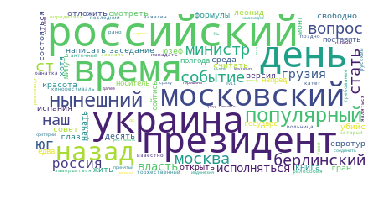

In [52]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stops,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(data['content_norm']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

здесь мы визуализировали самые частые слова за исключением стоп-слов - можем попробовать включить некоторые из них в расширенный список стоп-слов

In [148]:
new_stops = ["год", "страна", "главный", "развитый", "март", "сегодня", "бумажный", "нынешний", "назад", "популярный"]
stops = stops.union(new_stops)

In [149]:
from string import punctuation
from nltk.corpus import stopwords
punct = punctuation+'«»—…“”*№–'
stops = set(stopwords.words('russian'))
new_stops = ["год", "страна", "главный", "развитый", "март", "сегодня", "бумажный", "нынешний", "назад", "популярный"]
stops = stops.union(new_stops)


def normalize(text):
    
    words = [word.strip(punct) for word in text.lower().split()]
    words = [morph.parse(word)[0] for word in words if word and word not in stops]
    words = [word.inflect({'nomn'}).word for word in words if word.tag.POS == 'NOUN' or word.tag.POS == 'ADJF']

    return words

In [150]:
data['n_content_norm'] = data['content'].apply(normalize)

In [151]:
def evaluate(true_kws, predicted_kws):
    assert len(true_kws) == len(predicted_kws)
    
    precisions = []
    recalls = []
    f1s = []
    jaccards = []
    
    for i in range(len(true_kws)):
        true_kw = set(true_kws[i])
        predicted_kw = set(predicted_kws[i])
        
        tp = len(true_kw & predicted_kw)
        union = len(true_kw | predicted_kw)
        fp = len(predicted_kw - true_kw)
        fn = len(true_kw - predicted_kw)
        
        if (tp+fp) == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)
        
        if (tp+fn) == 0:
            rec = 0
        else:
            rec = tp / (tp + fn)
        if (prec+rec) == 0:
            f1 = 0
        else:
            f1 = (2*(prec*rec))/(prec+rec)
            
        jac = tp / union
        
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)
        jaccards.append(jac)
    print('Precision - ', round(np.mean(precisions), 2))
    print('Recall - ', round(np.mean(recalls), 2))
    print('F1 - ', round(np.mean(f1s), 2))
    print('Jaccard - ', round(np.mean(jaccards), 2))

In [152]:
evaluate(data['keywords'], data['n_content_norm'].apply(lambda x: [x[0] for x in Counter(x).most_common(6)]))

Precision -  0.19
Recall -  0.22
F1 -  0.19
Jaccard -  0.11


In [153]:
data['n_content_norm_str'] = data['n_content_norm'].apply(' '.join)

In [154]:
# можно заодно сделать нграммы
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=3)

In [155]:
tfidf.fit(data['n_content_norm_str'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [156]:
id2word = {i:word for i,word in enumerate(tfidf.get_feature_names())}

In [157]:
texts_vectors = tfidf.transform(data['n_content_norm_str'])

In [158]:
keywords = [[id2word[w] for w in top] for top in texts_vectors.toarray().argsort()[:,:-6:-1]] 

In [159]:
keywords[:3]

[['ольга васильев', 'стандарты', 'васильев', 'ольга', 'историческое'],
 ['красота', 'отчаяние', 'ваша', 'кошка', 'плохой'],
 ['пепеляев', 'юзефович', 'якутия', 'книга', 'восстание']]

In [160]:
evaluate(data['keywords'], keywords)

Precision -  0.2
Recall -  0.19
F1 -  0.19
Jaccard -  0.11


все тот же неплохой результат

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stops, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(data['n_content_norm_str'])

In [162]:
list(cv.vocabulary_.keys())[:10]

['среда',
 'заседание',
 'совет',
 'федеральные',
 'государственные',
 'образовательный',
 'стандарты',
 'министерство',
 'образование',
 'наука']

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

feature_names=cv.get_feature_names()
 
doc=data['n_content_norm_str']
 

tf_idf_vector=tfidf_transformer.transform(cv.transform(doc))

print(tf_idf_vector)

  (0, 9968)	0.022758860820445617
  (0, 9949)	0.09210566135049189
  (0, 9840)	0.03509011077553096
  (0, 9792)	0.024878563637533043
  (0, 9663)	0.12258516621599568
  (0, 9606)	0.04193858852364979
  (0, 9601)	0.019518334797999342
  (0, 9600)	0.07648563456876555
  (0, 9593)	0.029448045015287225
  (0, 9517)	0.026805889933940487
  (0, 9476)	0.03522765271866766
  (0, 9323)	0.034286540529456566
  (0, 9321)	0.022429592568931372
  (0, 9269)	0.025739944710295413
  (0, 9261)	0.04563029577931831
  (0, 9223)	0.0657919978923616
  (0, 9220)	0.034286540529456566
  (0, 9217)	0.0641848574002128
  (0, 9216)	0.04193858852364979
  (0, 9211)	0.020663525659124368
  (0, 9208)	0.017671171466041104
  (0, 9137)	0.03311085437275993
  (0, 9088)	0.07475793493254464
  (0, 8851)	0.0450755536808562
  (0, 8817)	0.02298654528833629
  :	:
  (987, 957)	0.03305648591738047
  (987, 930)	0.02154526016545619
  (987, 901)	0.033587972096663546
  (987, 862)	0.011934854970428939
  (987, 852)	0.028333658239265414
  (987, 786)	0.019

In [92]:
#сортируем tf_idf по убыванию
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #используем topn элементов из вектора
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # индекс слова и tf-idf score
    for idx, score in sorted_items:
        
        
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    
    results= []
    for idx in range(len(feature_vals)):
        return feature_vals
    
    return results

sorted_items=sort_coo(tf_idf_vector.tocoo())

keywords=[extract_topn_from_vector(feature_names,sorted_items,5)]
 


keywords[:9]

[['клуб', 'ковч', 'муссолини', 'муссолини', 'гавел']]